<h3>German Traffic Sign Benchmark (GTSRB) CNN Project</h3>
<h5>Problem Statement:</h5>

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

 - Single-image, multi-class classification problem
 - More than 40 classes
 - More than 50,000 images in total
 - Large, lifelike database

In [28]:
# import required libraries
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

Now what we will do is load all the images in a single list in form of an array that will describe the pixels of the image and another list which will contain labels of the corresponding image. To feed image data to the model we need to convert it into a NumPy array.

The training dataset contains a different folder with the name of classes named 0 to 42. with the help of the os module we will iterate through each class folder and append the image and respective label to the list. we also have CSV files that contain the actual label category name.

In [12]:
os.getcwd()

'e:\\iNeuron\\Deep Learning\\CNN\\German_Traffic_Sign_Recognition_Benchmark_(GTSRB)\\notebook'

In [16]:
imgs_path = r"Datasets/Train/"

data = []
labels = []
classes = 43

for i in range(classes):
    img_path = os.path.join(imgs_path, str(i))
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)
print("operation completed without any error")

operation completed without any error


In [17]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

In [18]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

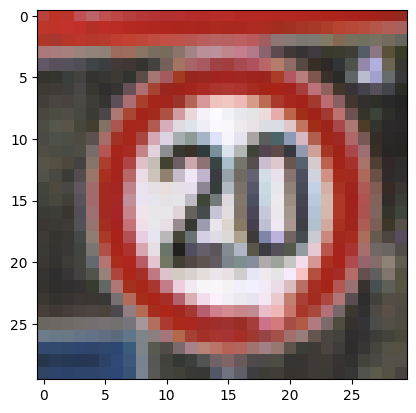

In [26]:
# explore a sample image
path = "E:/iNeuron/Deep Learning/CNN/German_Traffic_Sign_Recognition_Benchmark_(GTSRB)/notebook/Datasets/Train/0/00000_00000_00020.png"
img = Image.open(path)
img = img.resize((30,30))
sr = np.array(img)
plt.imshow(img)
plt.show()

In [27]:
# Split Dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [29]:
# Build a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [30]:
# Train and Validate the Model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 69s 137ms/step - loss: 2.4274 - accuracy: 0.3969 - val_loss: 0.9566 - val_accuracy: 0.7263
Epoch 2/15
491/491 [==============================] - 71s 144ms/step - loss: 1.0919 - accuracy: 0.6704 - val_loss: 0.4593 - val_accuracy: 0.8734
Epoch 3/15
491/491 [==============================] - 71s 145ms/step - loss: 0.7967 - accuracy: 0.7554 - val_loss: 0.3398 - val_accuracy: 0.9134
Epoch 4/15
491/491 [==============================] - 71s 145ms/step - loss: 0.6450 - accuracy: 0.8002 - val_loss: 0.2880 - val_accuracy: 0.9179
Epoch 5/15
491/491 [==============================] - 71s 145ms/step - loss: 0.5356 - accuracy: 0.8344 - val_loss: 0.2186 - val_accuracy: 0.9390
Epoch 6/15
491/491 [==============================] - 69s 141ms/step - loss: 0.4491 - accuracy: 0.8632 - val_loss: 0.1424 - val_accuracy: 0.9623
Epoch 7/15
491/491 [==============================] - 69s 140ms/step - loss: 0.3837 - accuracy: 0.8799 - val_loss: 0.1420 - val_ac

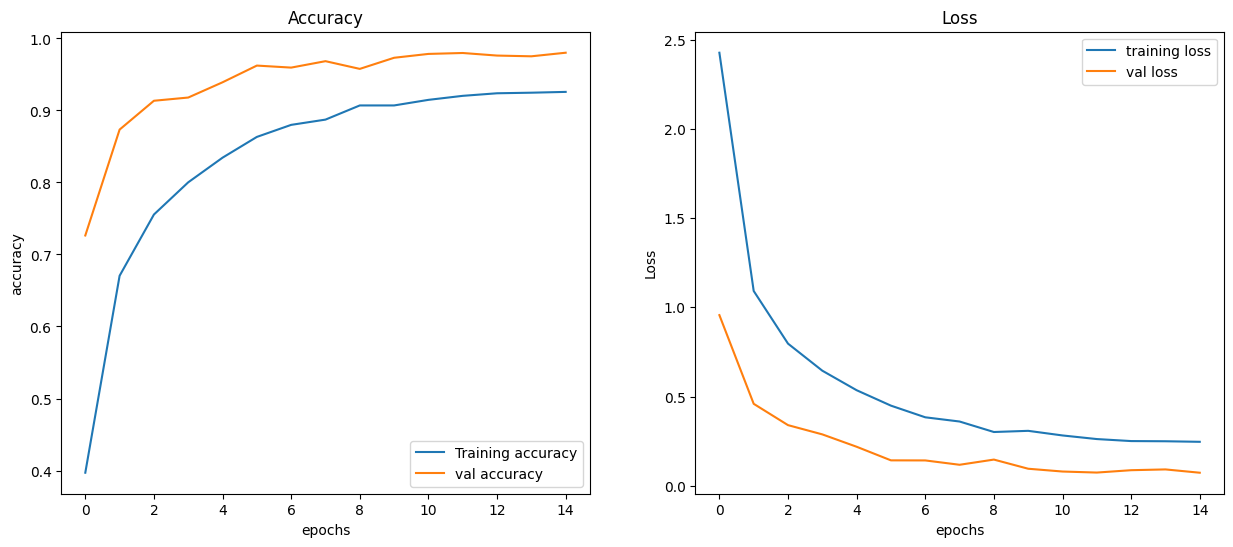

In [37]:
# plot accuracy and loss
plt.figure(figsize=(15,6))

plt.subplot2grid((1,2),(0,0))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()


plt.subplot2grid((1,2),(0,1))
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

# plt.tight_layout()
plt.show()

In [52]:
# Test the Model
from sklearn.metrics import accuracy_score
test = pd.read_csv("Datasets/Test.csv")
test_labels = test['ClassId'].values
test_labels = to_categorical(test_labels)
test_img_path = r"Datasets"
test_imgs = test['Path'].values

test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)

predictions = model.predict(test_data)
predictions = predictions>0.5
print("accuracy", accuracy_score(test_labels, predictions))

accuracy 0.9329374505146477


In [62]:
# Save the Model
model.save('traffic_classifier.h5')

In [79]:
# Build Traffic Classification GUI
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict([image])
    print(pred)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

[[9.99592841e-01 2.21917435e-04 1.38351464e-09 4.36602360e-12
  4.25963975e-09 1.43873289e-15 4.06973792e-19 1.98879281e-11
  1.85327372e-04 3.29662322e-15 5.01705320e-24 2.16825817e-20
  5.93340884e-22 1.70823616e-17 2.54788457e-19 4.99250272e-16
  6.14446501e-17 1.26066064e-17 9.72938758e-23 5.27835106e-29
  1.58987722e-18 1.96528345e-24 1.05467506e-27 8.82121051e-23
  4.01260686e-27 3.26683571e-26 3.30311375e-18 1.51041229e-27
  1.53399934e-19 1.07686758e-21 1.14781988e-22 3.94895264e-26
  3.39283150e-16 3.20660803e-26 8.95844213e-17 2.25922299e-18
  2.49944174e-20 1.69110281e-21 2.92673148e-18 5.42446456e-22
  1.51104894e-16 4.20154418e-23 1.96069868e-26]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "d:\anaconda\envs\Deep_Learning\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9932\3537641860.py", line 73, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9932\3537641860.py", line 69, in classify
    sign = classes[pred+1]
TypeError: unhashable type: 'numpy.ndarray'
